## 本节重点：

- softmax实现
- 欧式距离计算
- 概率抽样
- 寻优（局部极大值）

### 1. 如何计算Softmax得分？

- 描述：计算sepallength的softmax分数。

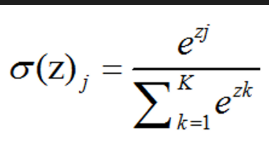

**给定：**

```python
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
sepallength = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0])
```

答案：

In [8]:
import numpy as np
# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')
sepallength = np.array([float(row[0]) for row in iris])

# Solution
def softmax(x):
    """Compute softmax values for each sets of scores in x.
    https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python"""
    #np.exp = e^a
    #第一步：归一化
    #第二部：求softmax
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

prob = softmax(sepallength)
print(prob)
print(np.sum(prob))


[0.00221959 0.00181724 0.00148783 0.00134625 0.00200836 0.00299613
 0.00134625 0.00200836 0.00110221 0.00181724 0.00299613 0.00164431
 0.00164431 0.00099732 0.0044697  0.00404435 0.00299613 0.00221959
 0.00404435 0.00221959 0.00299613 0.00221959 0.00134625 0.00221959
 0.00164431 0.00200836 0.00200836 0.00245302 0.00245302 0.00148783
 0.00164431 0.00299613 0.00245302 0.00331123 0.00181724 0.00200836
 0.00331123 0.00181724 0.00110221 0.00221959 0.00200836 0.00121813
 0.00110221 0.00200836 0.00221959 0.00164431 0.00221959 0.00134625
 0.00271101 0.00200836 0.01483991 0.00814432 0.01342771 0.00331123
 0.00900086 0.00404435 0.00736928 0.00181724 0.00994749 0.00245302
 0.00200836 0.00493978 0.0054593  0.00603346 0.00365948 0.01099368
 0.00365948 0.0044697  0.006668   0.00365948 0.00493978 0.00603346
 0.00736928 0.00603346 0.00814432 0.00994749 0.01214989 0.01099368
 0.0054593  0.00404435 0.00331123 0.00331123 0.0044697  0.0054593
 0.00299613 0.0054593  0.01099368 0.00736928 0.00365948 0.00331

### **2. 如何计算两个数组之间的欧氏距离？**

- 问题：计算两个数组a和数组b之间的欧氏距离。

欧式距离：

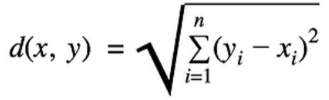

范数：

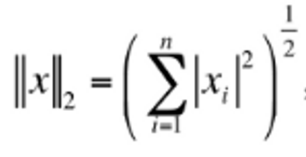

答案：

In [5]:
#函数说明：https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
# Input
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])

# Solution1 范数
dist1 = np.linalg.norm(a-b)
print(dist1)
# > 6.7082039324993694

# Solution 2
dist2 = np.sqrt(np.sum(np.square(a - b)))
print(dist2)

6.708203932499369
6.708203932499369


### 3. 如何在numpy中进行概率抽样？

- 描述：随机抽鸢尾属植物的种类，使得刚毛的数量是云芝和维吉尼亚的两倍

**给定：**
```python
# Import iris keeping the text column intact
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')
```

思路：
```python
1、
random.choice : https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

2、
np.linspace :https://blog.csdn.net/You_are_my_dream/article/details/53493752
np.searchsorted : https://blog.csdn.net/qq_33757398/article/details/89876088

```

答案：

In [6]:
# Import iris keeping the text column intact
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

# Solution
# Get the species column
species = iris[:, 4]

# Approach 1: Generate Probablistically
np.random.seed(100)
a = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
species_out = np.random.choice(a, 150, p=[0.5, 0.25, 0.25])
print(np.unique(species_out,return_counts=True))
# Approach 2: Probablistic Sampling (preferred)
np.random.seed(100)
probs = np.r_[np.linspace(0, 0.500, num=50), np.linspace(0.501, .750, num=50), np.linspace(.751, 1.0, num=50)]
index = np.searchsorted(probs, np.random.random(150))
species_out = species[index]
print(np.unique(species_out, return_counts=True))

# > (array([b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica'], dtype=object), array([77, 37, 36]))


(array([b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica'],
      dtype=object), array([77, 37, 36], dtype=int64))


### 4. 如何在一维数组中找到所有的局部极大值(或峰值)？

- 描述：找到一个一维数字数组a中的所有峰值。峰顶是两边被较小数值包围的点。

**给定：**
```python
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
```

期望的输出：
```python
 > array([2, 5])

```

其中，2和5是峰值7和6的位置。

答案：

In [7]:
# np.diff :https://numpy.org/doc/stable/reference/generated/numpy.diff.html
# np.sigh :https://blog.csdn.net/lyq_12/article/details/86645425
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
diff_sign = np.sign(np.diff(a))
doublediff = np.diff(diff_sign)
peak_locations = np.where(doublediff == -2)[0] + 1
peak_locations
# > array([2, 5])

array([2, 5], dtype=int64)